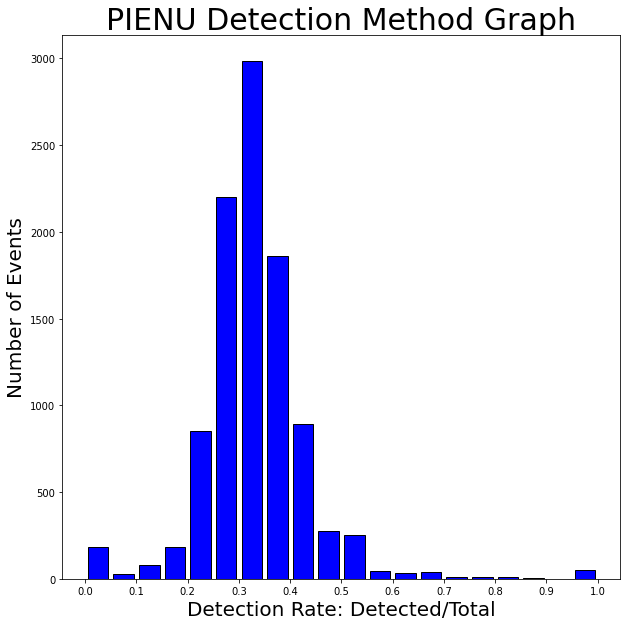

Average detection rate = 32.09%.


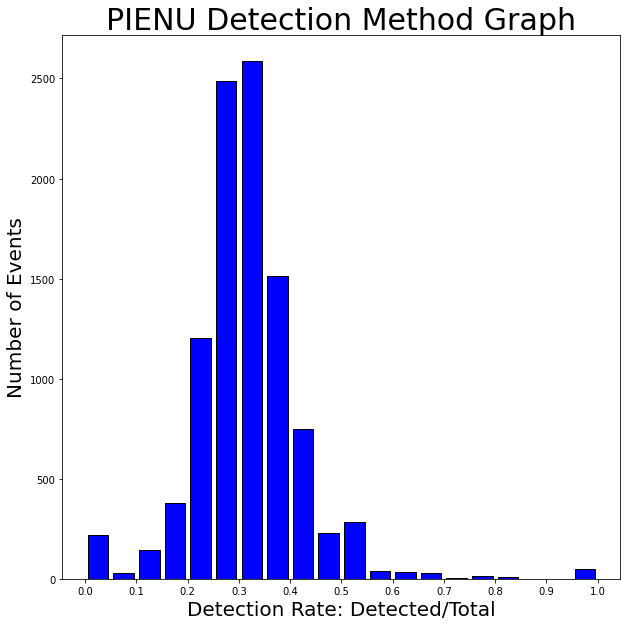

Average detection rate = 31.15%.


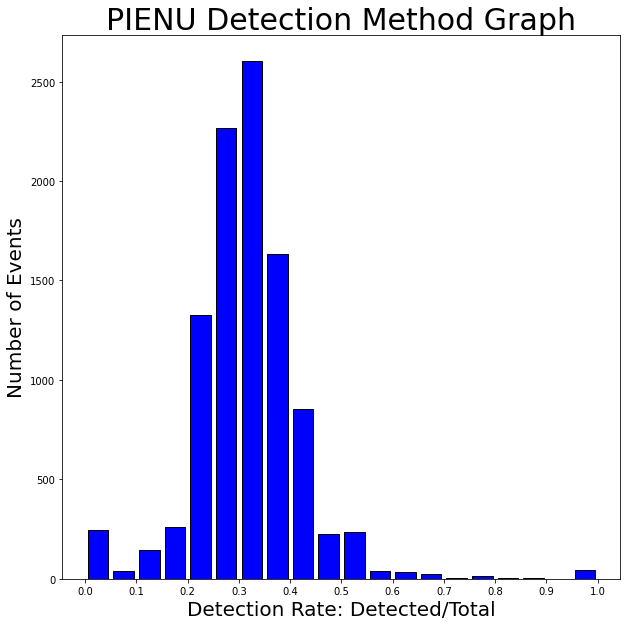

Average detection rate = 31.65%.


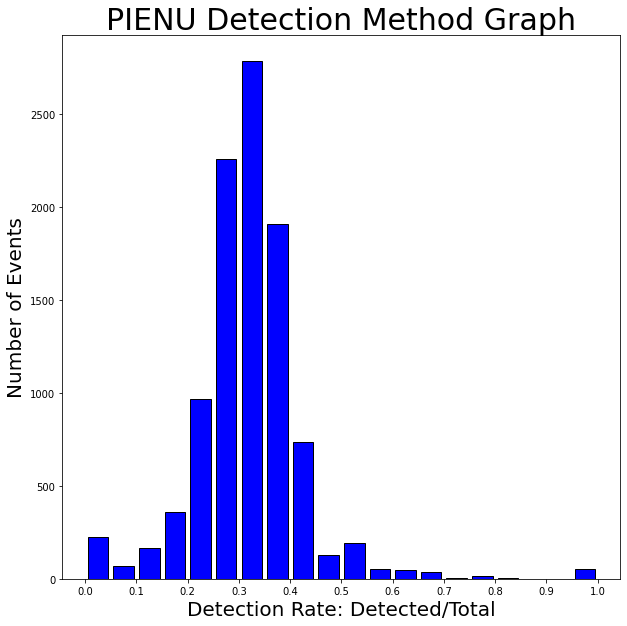

Average detection rate = 31.36%.


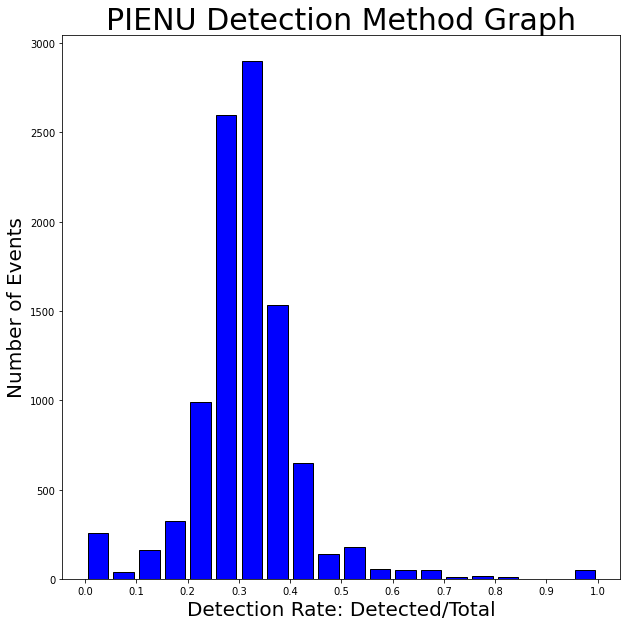

Average detection rate = 31.37%.


In [120]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

#number of runs
runs = 100

#detector size
length = 60 #mm

area = length**2

#detector distance
distance = 20 #mm

#mass of positron: Me
mass_pos = 0.51099 #MeV/c^2
mass_pos_2 = mass_pos**2
mass_pos_4 = mass_pos**4

#mass of pion: Mp 	2.4063 × 10−28
mass_pi = 139.57039 #MeV/c^2
mass_pi_2 = mass_pi**2
mass_pi_4 = mass_pi**4

#energy of positron: Ee
E_pos = 40 #MeV


#mass of sterile neutrino: Mn
mass_sn = np.sqrt(mass_pi**2 + mass_pos**2 -2*mass_pi*E_pos) #MeV/c^2
mass_sn_2 = mass_sn**2
mass_sn_4 = mass_sn**4

#momentum of positron == sterile neutrino: Pe == Pn
momentum_pos_sn = math.sqrt(abs((mass_sn_4 * mass_pos_4 * mass_pi_4 - 2*mass_sn_2*mass_pos_2 - 2*mass_sn_2*mass_pi_2 - 2*mass_pos_2*mass_pi_2)/(4*mass_pi_2)))

#energy of sterile neutrino: En

#angle Phi - 0 to 2pi
ran_phi = random.uniform(0,1) * 2*math.pi
#angle Theta 0 to pi
ran_theta = random.uniform(0,1)*math.pi

for k in range(0,5):
  sum = 0

  #create an numpy array of theta of detection condition and total theta
  #theta is the only condition to detection
  theta_array = np.array([])
  total_array = np.array([])

  #detection_rate will be the length of theta array/total array
  detection_rate = np.array([])

  #run for loop twice, simulate runs as many as possible
  for j in range(0,runs):
    #this for loop creates 1 set of data, but for loops must be high numbers, maybe bigger than 250
    for i in range(0,runs):
      ran_theta = random.uniform(0,1)*math.pi

      #the condition to be detected is tan(theta) = length/(2*distance), arc tan
      if (ran_theta >=0) & (ran_theta <= math.atan(length/(2*distance))):
          theta_array = np.append(theta_array,ran_theta)
      total_array = np.append(total_array,ran_theta)

      #move the dectection value to an array to plot in histogram
      detection = len(theta_array) / len(total_array)
      detection_rate = np.append(detection_rate, detection)
    
    #find the sum of the number of detections of theta array for average later in calculations
    sum += len(theta_array)

    #reset the theta and total arrays and re run over and over by resetting 1 set of data for the next set of data, but detection_rate is added on
    theta_array = np.array([])
    total_array = np.array([])

  #find the average by finding the sum of all detections divide by the number of runs
  avg = (sum/runs**2)*100

  x_intervals = [.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
  bins_intervals = [.0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]


  plt.figure(figsize=(10,10))
  plt.hist(detection_rate,bins = bins_intervals,rwidth=.8, ec='black',color="blue")
  plt.xticks(x_intervals)
  plt.xlabel("Detection Rate: Detected/Total",fontsize=20)
  plt.ylabel("Number of Events",fontsize=20)
  plt.title("PIENU Detection Method Graph",fontsize=30)
  plt.show()

  print(f"Average detection rate = {avg:.2f}%.")

